## Poject title: Customer Retention Enhancement through Predictive Analytics

## Introduction:

> The Data Science & Analytics team at Lloyds Banking Group leverages advanced data analysis techniques to provide actionable insights and predictive models that enhance customer retention and drive business decisions.

### Problem Statement:

> Over the past few months, our fictional client, SmartBank, a subsidiary of Lloyds, has reported that a substantial portion of their customer base, particularly among young professionals and small business owners, is at risk of moving to competitors offering more personalised banking solutions. This poses a substantial threat to our market position and long-term profitability. SmartBank has tasked our team with developing a predictive model to identify at-risk customers and propose targeted interventions to retain them.



> As a new data science graduate at Lloyds Banking Group and part of the Data Science & Analytics team, where each member contributes uniquely to projects. Your team has been assigned the task of enhancing customer retention through analytics, focusing on predicting customer churn. And you have been specifically chosen to take over this project due to your strong analytical skills and enthusiasm for solving real-world business problems.

### Goal(s):

*   Collaborate with the team to gather and analyse data relevant to customer churn.

*   Perform exploratory data analysis to uncover patterns and insights.

*   Clean and preprocess the data, and build a predictive model for customer churn.

*   Suggest ways to evaluate and measure the model's performance.

# Data loading.

*   Load the five sheets from the Excel file "**Customer_Churn_Data_Large.xlsx**" into pandas DataFrames using `pd.read_excel` function.





In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# Copy dataset file path from Google Drive into 'file_path' variable
file_path = '/content/drive/MyDrive/Forage Virtual Internships/Lloyds Bank/Customer_Churn_Data_Large.xlsx'

# Define a function to load each sheet into a DataFrame
def create_dataframe(sheet_name):
  """ This function loads each sheet into a DataFrame"""
  df = pd.read_excel(file_path, sheet_name=sheet_name)
  return df

# Load each sheet into a separate DataFrame
df_demographics = create_dataframe('Customer_Demographics')
df_transactions = create_dataframe('Transaction_History')
df_service = create_dataframe('Customer_Service')
df_online = create_dataframe('Online_Activity')
df_churn = create_dataframe('Churn_Status')

# Print the first few rows of each DataFrame
display(df_demographics.head())
display(df_transactions.head())
display(df_service.head())
display(df_online.head())
display(df_churn.head())

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel
0,1,62,M,Single,Low
1,2,65,M,Married,Low
2,3,18,M,Single,Low
3,4,21,M,Widowed,Low
4,5,21,M,Divorced,Medium


,CustomerID,TransactionID,TransactionDate,AmountSpent,ProductCategory
0,1,7194,2022-03-27,416.50,Electronics
1,2,7250,2022-08-08,54.96,Clothing
2,2,9660,2022-07-25,197.50,Electronics
3,2,2998,2022-01-25,101.31,Furniture
4,2,1228,2022-07-24,397.37,Clothing


,CustomerID,InteractionID,InteractionDate,InteractionType,ResolutionStatus
0,1,6363,2022-03-31,Inquiry,Resolved
1,2,3329,2022-03-17,Inquiry,Resolved
2,3,9976,2022-08-24,Inquiry,Resolved
3,4,7354,2022-11-18,Inquiry,Resolved
4,4,5393,2022-07-03,Inquiry,Unresolved


,CustomerID,LastLoginDate,LoginFrequency,ServiceUsage
0,1,2023-10-21,34,Mobile App
1,2,2023-12-05,5,Website
2,3,2023-11-15,3,Website
3,4,2023-08-25,2,Website
4,5,2023-10-27,41,Website


,CustomerID,ChurnStatus
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0


# Data exploration


*   Explore the loaded datasets to understand their structure, data types, missing values, distributions and visualize key numerical variables.



Exploring DataFrame: Demographics
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            1000 non-null   int64 
 1   Gender         1000 non-null   object
 2   MaritalStatus  1000 non-null   object
 3   IncomeLevel    1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


,count,mean,std,min,25%,50%,75%,max
Age,1000.0,43.267,15.242311,18.0,30.0,43.0,56.0,69.0


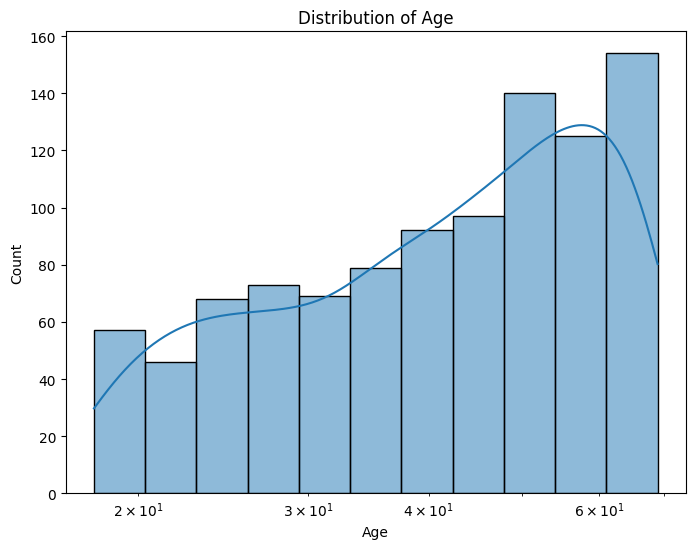

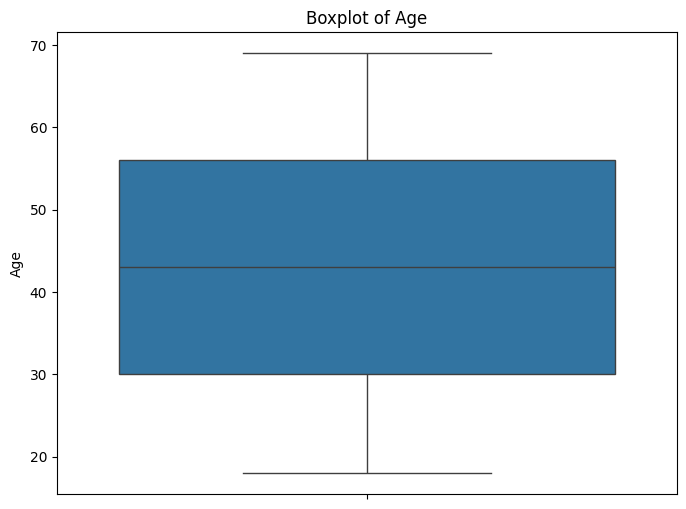


Value counts for column 'Gender':


,Gender,proportion
0,F,51.3
1,M,48.7



Value counts for column 'MaritalStatus':


,MaritalStatus,proportion
0,Widowed,27.6
1,Married,26.1
2,Divorced,24.8
3,Single,21.5



Value counts for column 'IncomeLevel':


,IncomeLevel,proportion
0,High,34.9
1,Medium,32.6
2,Low,32.5



Percentage of missing values:


,0
Age,0.0
Gender,0.0
MaritalStatus,0.0
IncomeLevel,0.0


--------------------------------------------------
Exploring DataFrame: Transactions
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5054 entries, 0 to 5053
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionDate  5054 non-null   datetime64[ns]
 1   AmountSpent      5054 non-null   float64       
 2   ProductCategory  5054 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 118.6+ KB


,count,mean,min,25%,50%,75%,max,std
TransactionDate,5054,2022-07-01 19:25:37.158686208,2022-01-01 00:00:00,2022-04-03 00:00:00,2022-07-01 00:00:00,2022-09-29 00:00:00,2022-12-31 00:00:00,NaN
AmountSpent,5054.0,250.707351,5.18,127.105,250.525,373.4125,499.86,142.250838


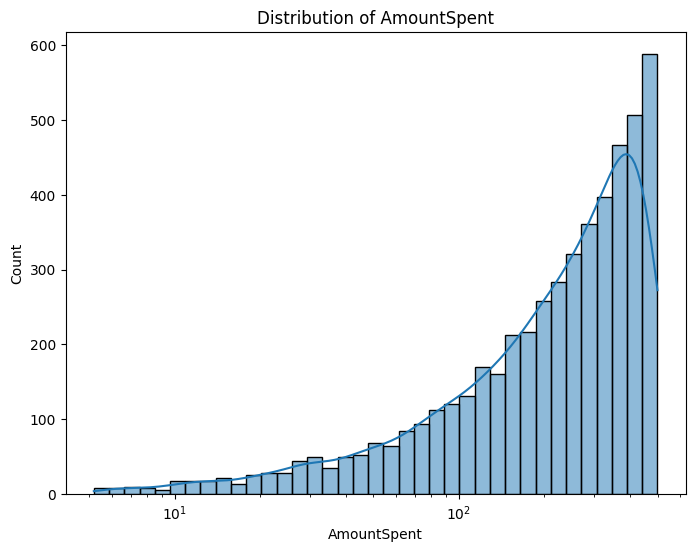

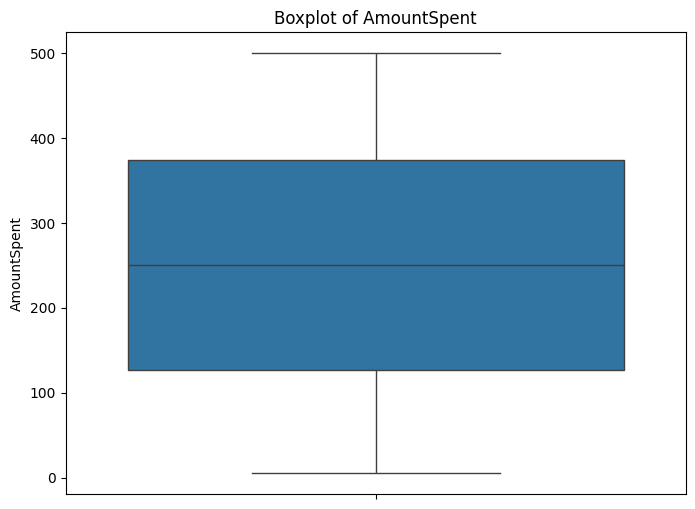


Value counts for column 'ProductCategory':


,ProductCategory,proportion
0,Books,20.60
1,Groceries,20.18
2,Electronics,19.81
3,Clothing,19.79
4,Furniture,19.63



Percentage of missing values:


,0
TransactionDate,0.0
AmountSpent,0.0
ProductCategory,0.0


--------------------------------------------------
Exploring DataFrame: Service
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   InteractionDate   1002 non-null   datetime64[ns]
 1   InteractionType   1002 non-null   object        
 2   ResolutionStatus  1002 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 23.6+ KB


,count,mean,min,25%,50%,75%,max
InteractionDate,1002,2022-07-02 19:28:22.994011904,2022-01-01 00:00:00,2022-04-07 00:00:00,2022-07-02 12:00:00,2022-09-30 00:00:00,2022-12-30 00:00:00



Value counts for column 'InteractionType':


,InteractionType,proportion
0,Feedback,35.93
1,Complaint,33.43
2,Inquiry,30.64



Value counts for column 'ResolutionStatus':


,ResolutionStatus,proportion
0,Resolved,52.2
1,Unresolved,47.8



Percentage of missing values:


,0
InteractionDate,0.0
InteractionType,0.0
ResolutionStatus,0.0


--------------------------------------------------
Exploring DataFrame: Online
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   LastLoginDate   1000 non-null   datetime64[ns]
 1   LoginFrequency  1000 non-null   int64         
 2   ServiceUsage    1000 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 23.6+ KB


,count,mean,min,25%,50%,75%,max,std
LastLoginDate,1000,2023-07-05 21:28:48,2023-01-01 00:00:00,2023-04-08 00:00:00,2023-07-10 12:00:00,2023-10-01 06:00:00,2023-12-31 00:00:00,NaN
LoginFrequency,1000.0,25.912,1.0,13.75,27.0,38.0,49.0,14.055953


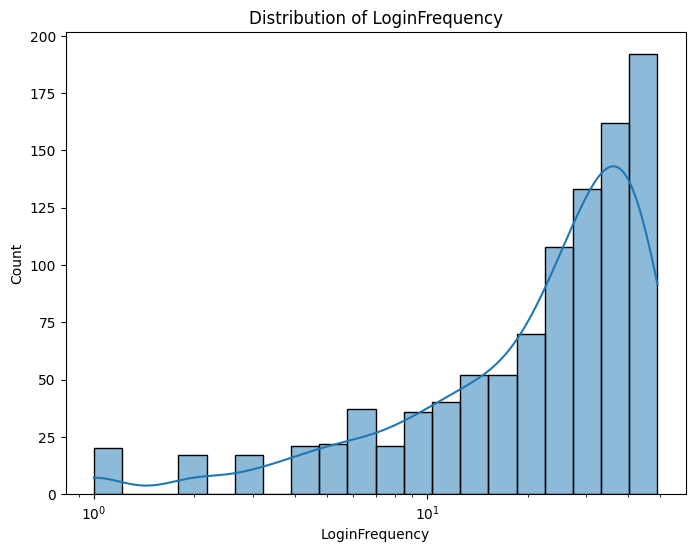

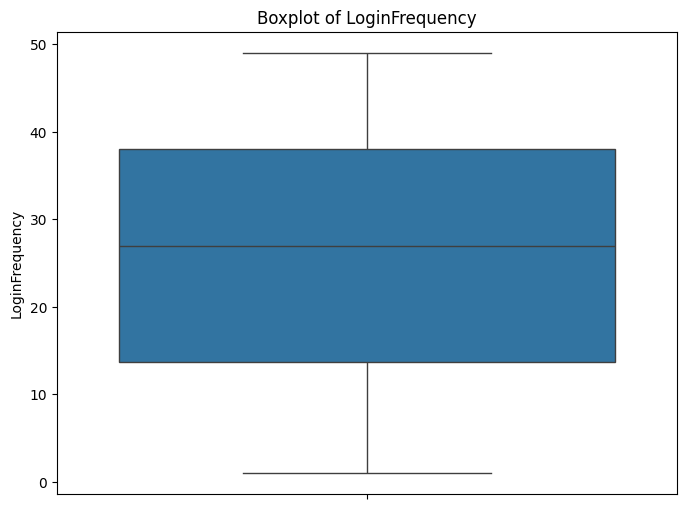


Value counts for column 'ServiceUsage':


,ServiceUsage,proportion
0,Online Banking,34.9
1,Mobile App,34.2
2,Website,30.9



Percentage of missing values:


,0
LastLoginDate,0.0
LoginFrequency,0.0
ServiceUsage,0.0


--------------------------------------------------
Exploring DataFrame: Churn
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ChurnStatus  1000 non-null   int64
dtypes: int64(1)
memory usage: 7.9 KB


,count,mean,std,min,25%,50%,75%,max
ChurnStatus,1000.0,0.204,0.403171,0.0,0.0,0.0,0.0,1.0


Skipping plotting for ChurnStatus in Churn as dataframe is empty after dropping ChurnStatus.

Percentage of missing values:


,0
ChurnStatus,0.0


--------------------------------------------------


In [6]:
# Create a function to explore each dataframe
def explore_dataframe(df, df_name):
  """ This function explores each dataframe"""
  print(f"Exploring DataFrame: {df_name}")

  # Create a copy of the dataframe to avoid modifying the original
  df_explore = df.copy()

  # Drop columns if they exist
  col_to_drop = ['CustomerID', 'TransactionID', 'InteractionID']
  for col in col_to_drop:
    if col in df_explore.columns:
      df_explore.drop(columns=[col], inplace=True)

  # Display dataframe information
  df_explore.info()

  # Display summary statistics
  display(df_explore.describe().T)

  # Iterate through each column in the dataframe
  for col in df_explore.columns:
    if df_explore[col].dtype == 'object':
      print(f"\nValue counts for column '{col}':")
      display(round(df_explore[col].value_counts(normalize = True)*100, 2).reset_index())
    elif pd.api.types.is_numeric_dtype(df_explore[col]):
      # Only drop 'ChurnStatus' if it exists in the dataframe
      if 'ChurnStatus' in df_explore.columns:
        df_explore_numeric = df_explore.drop(columns=['ChurnStatus']).copy()
      else:
        df_explore_numeric = df_explore.copy()

      # Check if the dataframe is empty before attempting to plot
      if not df_explore_numeric.empty:
        plt.figure(figsize=(8, 6))
        sns.histplot(df_explore_numeric[col], kde=True, log_scale=True) # Plot histogram of column
        plt.title(f'Distribution of {col}')
        plt.show()
        plt.figure(figsize=(8, 6))
        sns.boxplot(y=df_explore_numeric[col]) # Plot boxplot of column
        plt.title(f'Boxplot of {col}')
        plt.show()
      else:
        print(f"Skipping plotting for {col} in {df_name} as dataframe is empty after dropping ChurnStatus.")


  # Calculate percentages of missing values
  missing_percentage = (df_explore.isnull().sum() / len(df_explore)) * 100

  print("\nPercentage of missing values:")
  display(missing_percentage)
  print("-" * 50)

dataframes = {
    "Demographics": df_demographics,
    "Transactions": df_transactions,
    "Service": df_service,
    "Online": df_online,
    "Churn": df_churn,
}

for df_name, df in dataframes.items():
    explore_dataframe(df, df_name)

### 🔍 **Insights**
Based on the data exploration:

*   there are no missing values or inconsistencies in the dataframes as shown by percentage of missing values.

*   all features in the dataframes have the correct data types.

*   there are no outliers in any of the numeric variables of the dataframes as depicted by the box plots.

# Data cleaning
Clean the five dataframes: `df_demographics`, `df_transactions`, `df_service`, `df_online`, and `df_churn`.


*   Based on the data exploration, there are no missing values or inconsistencies in the dataframes.

*   Data types for all features looks good and there are no  outliers. However, dataframes needs to be checked for duplicate records if any.




In [8]:
# Check dataframes for duplicate records
print("Duplicate records in df_demographics:", df_demographics.duplicated().sum())
print("Duplicate records in df_transactions:", df_transactions.duplicated().sum())
print("Duplicate records in df_service:", df_service.duplicated().sum())
print("Duplicate records in df_online:", df_online.duplicated().sum())
print("Duplicate records in df_churn:", df_churn.duplicated().sum())

Duplicate records in df_demographics: 0
Duplicate records in df_transactions: 0
Duplicate records in df_service: 0
Duplicate records in df_online: 0
Duplicate records in df_churn: 0


# Data wrangling
Merge the five DataFrames (`df_demographics`, `df_transactions`, `df_service`, `df_online`, and `df_churn`) into a single DataFrame called `df_merged` using `CustomerID` as the key. Use left joins to keep all rows from the demographics dataframe, as it represents the base customer data.  Check for and handle potential inconsistencies after each merge.

In [9]:
# Merge demographics and transactions
df_merged = pd.merge(df_demographics, df_transactions, on='CustomerID', how='left')

# Check for duplicates and inconsistencies
print("Shape after merging demographics and transactions:", df_merged.shape)
print("Duplicate columns after merging demographics and transactions:", df_merged.columns[df_merged.columns.duplicated()], '\n')

# Merge with service data
df_merged = pd.merge(df_merged, df_service, on='CustomerID', how='left')

# Check for duplicates and inconsistencies
print("Shape after merging demographics, transactions, and service:", df_merged.shape)
print("Duplicate columns after merging demographics, transactions, and service:", df_merged.columns[df_merged.columns.duplicated()], '\n')

# Merge with online data
df_merged = pd.merge(df_merged, df_online, on='CustomerID', how='left')

# Check for duplicates and inconsistencies
print("Shape after merging demographics, transactions, service and online:", df_merged.shape)
print("Duplicate columns after merging demographics, transactions, service and online:", df_merged.columns[df_merged.columns.duplicated()], '\n')

# Merge with churn data
df_merged = pd.merge(df_merged, df_churn, on='CustomerID', how='left')

# Check for duplicates and inconsistencies
print("Shape after merging all dataframes:", df_merged.shape)
print("Duplicate columns after merging all dataframes:", df_merged.columns[df_merged.columns.duplicated()], '\n')

# Display info and first few rows of the merged DataFrame
display(df_merged.head())
df_merged.info()

# Print the percentage of missing values in each column
print("\nPercentage of missing values in each column:")
print((df_merged.isnull().sum() / len(df_merged)) * 100)

# Print the summary statistics of the merged DataFrame
print("\nSummary statistics of the merged DataFrame:")
display(df_merged.describe().T)

# print the shape of the merged DataFrame
print("\nShape of the merged DataFrame:", df_merged.shape)

Shape after merging demographics and transactions: (5054, 9)
Duplicate columns after merging demographics and transactions: Index([], dtype='object') 

Shape after merging demographics, transactions, and service: (6812, 13)
Duplicate columns after merging demographics, transactions, and service: Index([], dtype='object') 

Shape after merging demographics, transactions, service and online: (6812, 16)
Duplicate columns after merging demographics, transactions, service and online: Index([], dtype='object') 

Shape after merging all dataframes: (6812, 17)
Duplicate columns after merging all dataframes: Index([], dtype='object') 



,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TransactionID,TransactionDate,AmountSpent,ProductCategory,InteractionID,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus
0,1,62,M,Single,Low,7194,2022-03-27,416.50,Electronics,6363.0,2022-03-31,Inquiry,Resolved,2023-10-21,34,Mobile App,0
1,2,65,M,Married,Low,7250,2022-08-08,54.96,Clothing,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
2,2,65,M,Married,Low,9660,2022-07-25,197.50,Electronics,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
3,2,65,M,Married,Low,2998,2022-01-25,101.31,Furniture,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
4,2,65,M,Married,Low,1228,2022-07-24,397.37,Clothing,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        6812 non-null   int64         
 1   Age               6812 non-null   int64         
 2   Gender            6812 non-null   object        
 3   MaritalStatus     6812 non-null   object        
 4   IncomeLevel       6812 non-null   object        
 5   TransactionID     6812 non-null   int64         
 6   TransactionDate   6812 non-null   datetime64[ns]
 7   AmountSpent       6812 non-null   float64       
 8   ProductCategory   6812 non-null   object        
 9   InteractionID     5204 non-null   float64       
 10  InteractionDate   5204 non-null   datetime64[ns]
 11  InteractionType   5204 non-null   object        
 12  ResolutionStatus  5204 non-null   object        
 13  LastLoginDate     6812 non-null   datetime64[ns]
 14  LoginFrequency    6812 n

,count,mean,min,25%,50%,75%,max,std
CustomerID,6812.0,500.16926,1.0,247.0,505.5,750.0,1000.0,286.704642
Age,6812.0,43.274516,18.0,30.0,44.0,56.0,69.0,15.286788
TransactionID,6812.0,5497.323253,1000.0,3223.5,5515.0,7675.25,9997.0,2584.768541
TransactionDate,6812,2022-07-01 02:11:29.136817408,2022-01-01 00:00:00,2022-04-02 00:00:00,2022-07-01 00:00:00,2022-09-30 00:00:00,2022-12-31 00:00:00,NaN
AmountSpent,6812.0,251.620527,5.18,127.1,251.845,375.28,499.86,142.901693
InteractionID,5204.0,5921.861261,2015.0,3873.25,5903.0,7851.0,9997.0,2332.33126
InteractionDate,5204,2022-07-01 16:31:10.561106944,2022-01-01 00:00:00,2022-04-07 00:00:00,2022-07-02 00:00:00,2022-09-25 00:00:00,2022-12-30 00:00:00,NaN
LastLoginDate,6812,2023-07-06 04:56:47.633587712,2023-01-01 00:00:00,2023-04-12 00:00:00,2023-07-13 00:00:00,2023-10-01 00:00:00,2023-12-31 00:00:00,NaN
LoginFrequency,6812.0,25.72431,1.0,14.0,26.0,38.0,49.0,14.062032
ChurnStatus,6812.0,0.198473,0.0,0.0,0.0,0.0,1.0,0.39888



Shape of the merged DataFrame: (6812, 17)


### 🔍 **Insights**

### **Data Overview**

* **Rows:** 6,812
* **Columns:** 17
* **Column Types:** 5 integers, 2 floats, 7 categorical (object), 3 datetimes
* **Date Fields:** `TransactionDate`, `InteractionDate`, `LastLoginDate`
* **Target Variable:** `ChurnStatus` (0 = No churn, 1 = Churn)
* **Missing Data:** Only in `InteractionID`, `InteractionDate`, `InteractionType`, and `ResolutionStatus` (\~1,608 missing values each).

### **Key Numerical Insights**

* **Average Age:** \~43 years (range: 18–69)
* **Average Amount Spent (per transaction):** \~\$252 (range: \$5–\$500)
* **Average Login Frequency:** \~26 times
* **Churn Rate:** \~19.85%

# Feature Engineering
Create any potentially useful derived variables from the `df_merged` dataframe to enrich the data.

In [10]:
# Create Derived Variables

# Total amount spent per customer
df_merged['TotalAmountSpent'] = \
df_merged.groupby('CustomerID')['AmountSpent'].transform('sum')

# Average transaction amount per customer
df_merged['AvgTransactionAmount'] = \
df_merged.groupby('CustomerID')['AmountSpent'].transform('mean')

# Transaction frequency per customer
df_merged['TransactionFrequency'] = \
df_merged.groupby('CustomerID')['TransactionID'].transform('count')

# Days since last login
# df_merged['DaysSinceLastLogin'] = (pd.to_datetime('2025-04-19') - df_merged['LastLoginDate']).dt.days

# Create age categories
df_merged['AgeGroup'] = pd.cut(df_merged['Age'], bins=[0, 25, 45, 65, 100],
                              labels=['Young Adult', 'Adult', 'Senior', 'Elderly'])

# Display the first few rows with the new 'AgeGroup' column
display(df_merged[['Age', 'AgeGroup']].head())

,Age,AgeGroup
0,62,Senior
1,65,Senior
2,65,Senior
3,65,Senior
4,65,Senior


# Data visualization
Create visualizations to communicate insights from the analysis. Visualize important features and feature importance.

### **1. Churn rate across categories** – Gender, Marital Status, Income Level, Age Group, Service Usage, Product Category.



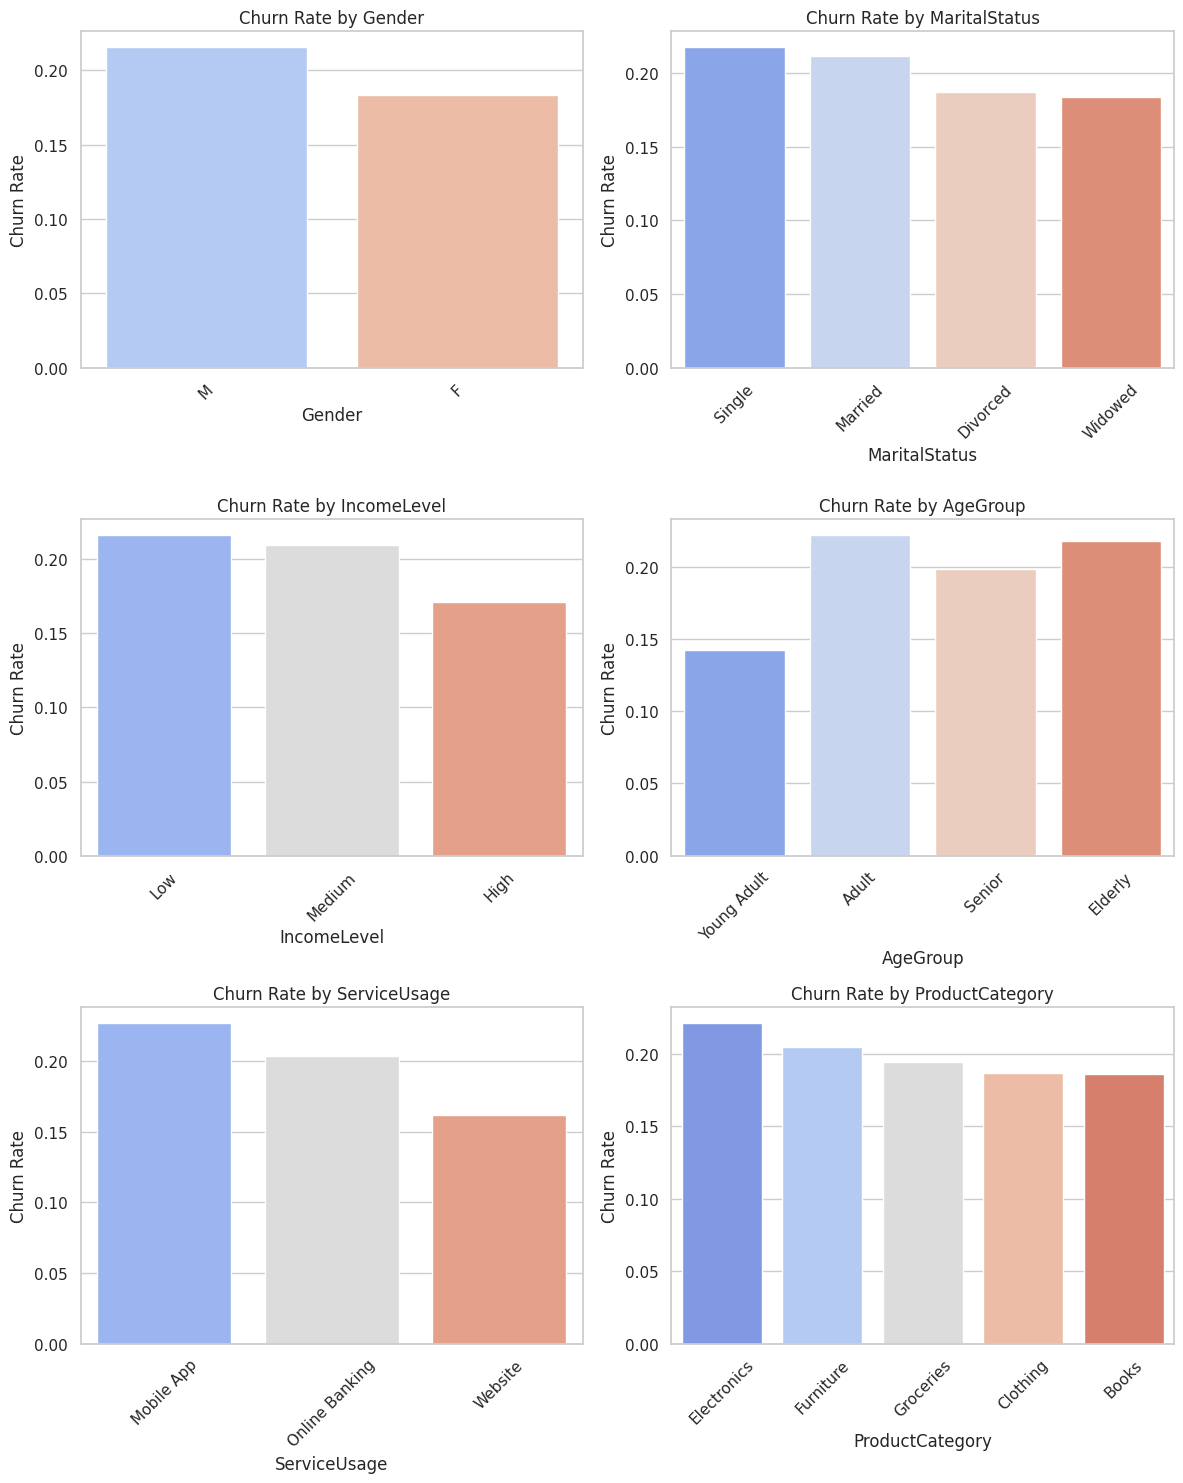

In [14]:
sns.set(style="whitegrid")

# Churn rate across categories
cat_features = ['Gender', 'MaritalStatus', 'IncomeLevel',
                'AgeGroup', 'ServiceUsage', 'ProductCategory']

# Create a single figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 15))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(cat_features):
    churn_rate = df_merged.groupby(col)['ChurnStatus'].mean().sort_values(ascending=False)
    sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='coolwarm', ax=axes[i])
    axes[i].set_title(f'Churn Rate by {col}')
    axes[i].set_ylabel('Churn Rate')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

### 🔍 **Insights**
From churn rates by Gender, Marital Status, Income Level, Age Group, Service Usage, Product Category:
* **Gender:** Male customers churned at **22%** vs. **18%** for Female customers – indicating slightly higher risk among males.
* **Marital Status:** Single customers churned at **23%**, compared to **22%** for married customers.
* **Income Level:** Low-income customers had the highest churn rate at **23%** vs. **17%** for high-income customers.
* **Age Group:** Customers aged less than or equal 25(**Young Adult**) had the lowest churn rate of **14%** among all age groups.
* **Service Usage:** Customers using mobile app to login churned at **24%**, while customers using other services churned at **20%** or less.
* **Product Category:** Churn was highest in the “Electronics” product line at **23%**.

### **2. Numerical comparison**s – Compare Age, Amount Spent, Login Frequency, Transaction Frequency between churned and retained customers.

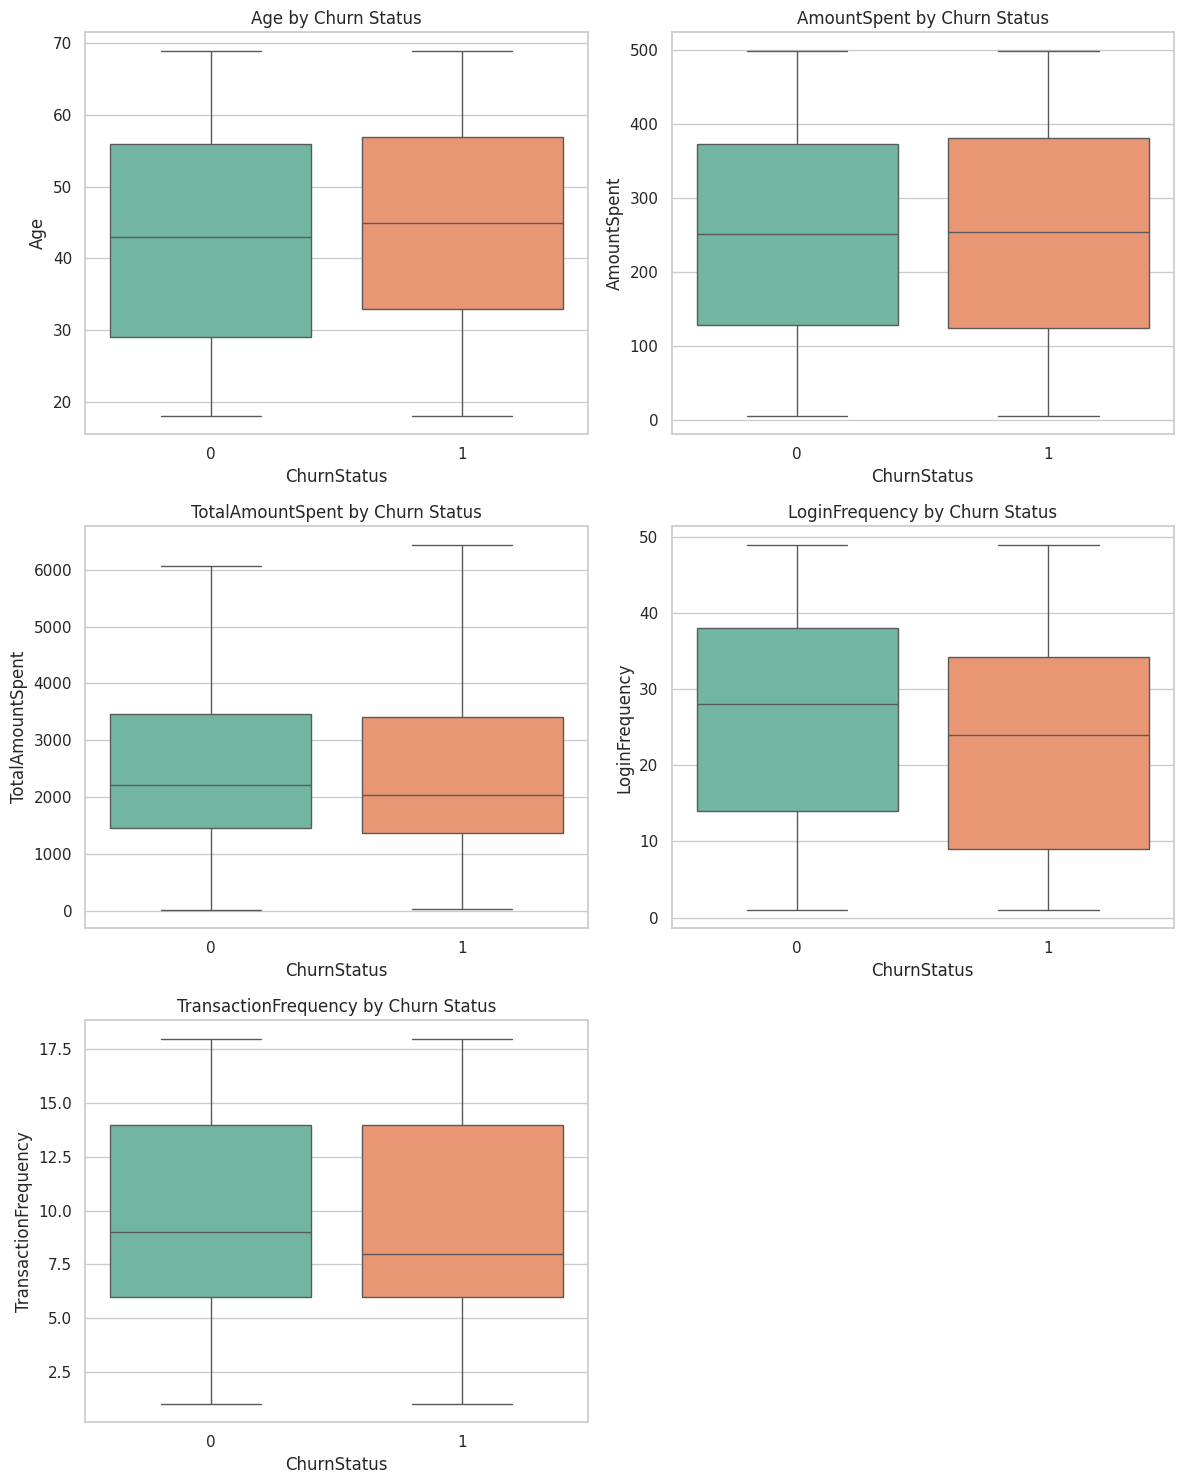

In [15]:
# Numerical comparisons (boxplots)
num_features = ['Age', 'AmountSpent', 'TotalAmountSpent',
                'LoginFrequency', 'TransactionFrequency']

# Create a single figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 15)) # Adjust figsize as needed
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(num_features):
    sns.boxplot(x='ChurnStatus', y=col, data=df_merged, palette='Set2', ax=axes[i])
    axes[i].set_title(f'{col} by Churn Status')

# Remove any unused subplots if the number of features is odd
if len(num_features) < len(axes):
    for j in range(len(num_features), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

### 🔍 **Insights**

From the boxplots for Amount Spent, Login Frequency, Transaction Frequency:

* **Total Amount Spent:** Churned customers spend less on average than retained customers (2000 vs 2400).
* **Login Frequency:** Lower login activity is linked to higher churn (25 vs 28).
* **Transaction Frequency:** There is lower transaction frequency among churned customers (8 vs 9.5).

### **3. Time-based churn trends** – Churn rate over months.

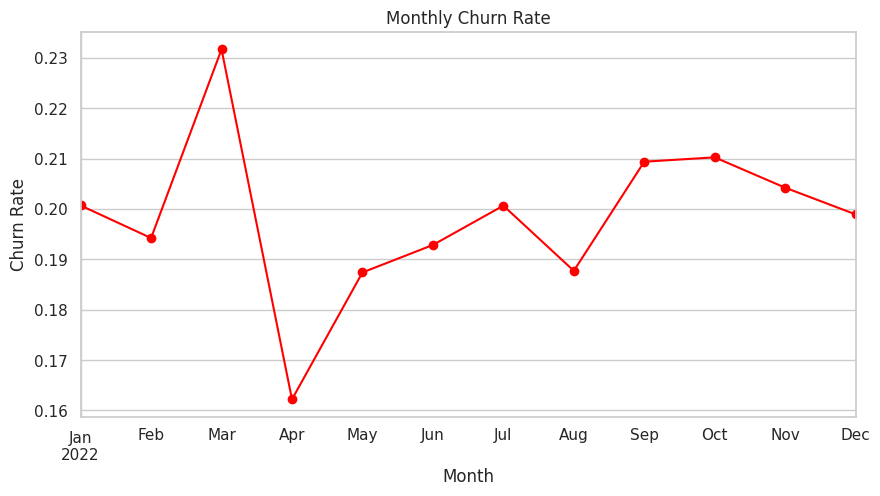

In [19]:
# Time-based churn trends
plt.figure(figsize=(10,5))
churn_trend = \
df_merged.groupby(df_merged['TransactionDate'].dt.to_period('M'))['ChurnStatus'].mean()
churn_trend.plot(marker='o', color='red')
plt.title('Monthly Churn Rate')
plt.xlabel('Month')
plt.ylabel('Churn Rate')
plt.show()

### 🔍 **Insights**
* **Trend:** Churn rate rose sharply in **Q1** and nose dived in **Q2**, steadily increased in **Q3**, remained constant at the beginning of **Q4** before slightly fallen .
* **Peak Months:** Churn peaked in **March**, and dropped to the lowest in **April**.

### **4. Correlation with churn** – Heatmap with ChurnStatus included.

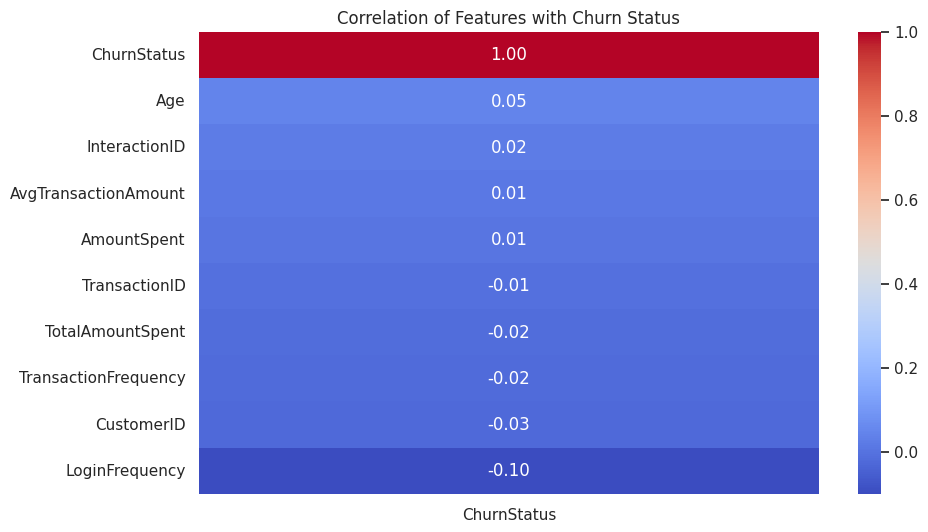

In [20]:
# Correlation with churn
plt.figure(figsize=(10,6))
corr_churn = df_merged.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr_churn[['ChurnStatus']].sort_values(by='ChurnStatus',
            ascending=False), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Features with Churn Status')
plt.show()

### 🔍 **Insights**

From correlation heatmap:

* Variables most strongly correlated with churn:

  * `Age` – correlation: 0.05
  * `LoginFrequency` – correlation: -0.1

### **5. Feature importance preview** – Quick tree-based model to see top predictors.

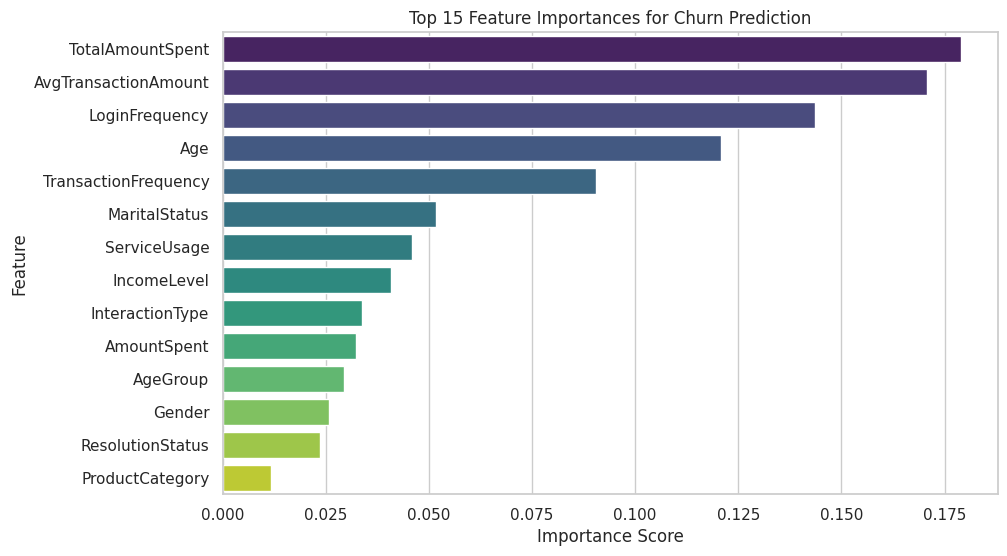

                Feature  Importance_Score
0      TotalAmountSpent          0.178865
1  AvgTransactionAmount          0.170737
2        LoginFrequency          0.143570
3                   Age          0.120751
4  TransactionFrequency          0.090502


In [21]:
# Feature importance (RandomForest)
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Drop ID columns
df_merged_dropped = df_merged.drop(columns=['CustomerID', 'TransactionID',
                                            'InteractionID'])

# Encode categorical variables
df_encoded = df_merged_dropped.copy()

# Convert 'AgeGroup' to 'object' dtype to be included in the encoding loop
df_encoded['AgeGroup'] = df_encoded['AgeGroup'].astype('object')

label_encoders = {}
for col in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le

# Drop datetime columns before training
datetime_cols = df_encoded.select_dtypes(include=['datetime64[ns]']).columns
df_encoded = df_encoded.drop(columns=datetime_cols)

# Define features & target
X = df_encoded.drop(columns=['ChurnStatus'])
y = df_encoded['ChurnStatus']

# Train RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Feature importance plot
feat_importances = \
pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances.values[:15], y=feat_importances.index[:15],
            palette='viridis')
plt.title('Top 15 Feature Importances for Churn Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# Display feature importance values
feature_importances_df = \
pd.DataFrame({'Feature': feat_importances.index, 'Importance_Score': feat_importances.values})
feature_importances_df.sort_values(by='Importance_Score', ascending=False, inplace=True)

# print top 5 most important features
# feature_importances_df = feature_importances_df.head(5)
print(feature_importances_df.head(5))

### 🔍 **Insights**

Top 5 Predictive Factors from tree-based feature importance are:
          
  1. `TotalAmountSpent` – 0.178865
  2. `AvgTransactionAmount` – 0.170737
  3. `LoginFrequency` – 0.143570
  4. `Age` – 0.120751
  5. `TransactionFrequency` – 0.090502

# Data preparation
Prepare the merged dataset `df_merged` for model training.  This involves handling categorical features, scaling numerical features, and performing a data quality check and save the prepared data to `df_prepared`. Then split the prepared dataset `df_prepared` into training and test sets.


In [22]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import numpy as np

# Drop ID columns and InteractionDate field
df_merged_dropped = df_merged.drop(columns=['CustomerID', 'TransactionID',
                                            'InteractionID', 'InteractionDate'])

# Select top 10 most important features and include ChurnStatus
top_features = feature_importances_df['Feature'].head(10).tolist()
top_features.append('ChurnStatus') # Include ChurnStatus
df_merged_dropped = df_merged_dropped[top_features]

# Handle Categorical Features
categorical_cols =  df_merged_dropped.select_dtypes(include=['object']).columns.tolist()

# One-hot encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features = encoder.fit_transform(df_merged_dropped[categorical_cols])
encoded_df = \
pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))

# Convert 'ChurnStatus' to numeric if needed
df_merged_dropped['ChurnStatus'] = pd.to_numeric(df_merged_dropped['ChurnStatus'], errors='coerce')

# Scale Numerical Features
numerical_cols = df_merged_dropped.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Remove 'ChurnStatus' from numerical_cols if it was included
if 'ChurnStatus' in numerical_cols:
  numerical_cols.remove('ChurnStatus')

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_merged_dropped[numerical_cols])
scaled_df = pd.DataFrame(scaled_features, columns=numerical_cols)


# Combine all features
# Dropping categorical columns from df_merged_dropped before concat
# Ensure 'ChurnStatus' is included in the DataFrame before concatenation
df_prepared = pd.concat([scaled_df, encoded_df, df_merged_dropped['ChurnStatus']], axis=1)


# Perform Data Quality Check
# Check for missing values
print("Missing values in df_prepared:\n", df_prepared.isnull().sum())

# Identify numerical columns in df_prepared for imputation
numerical_cols_prepared = df_prepared.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove 'ChurnStatus' from the list of columns to impute
if 'ChurnStatus' in numerical_cols_prepared:
    numerical_cols_prepared.remove('ChurnStatus')

imputer = SimpleImputer(strategy='mean')
df_prepared[numerical_cols_prepared] = \
imputer.fit_transform(df_prepared[numerical_cols_prepared])

# Check for missing values again
print("\nMissing values after imputation in df_prepared:\n", df_prepared.isnull().sum())

# Remove rows with any remaining missing values (should only be 'ChurnStatus' if it had NaNs)
df_prepared.dropna(subset=['ChurnStatus'], inplace=True)


# Display the first 5 rows in Prepared Data
display(df_prepared.head())

Missing values in df_prepared:
 TotalAmountSpent               0
AvgTransactionAmount           0
LoginFrequency                 0
Age                            0
TransactionFrequency           0
AmountSpent                    0
MaritalStatus_Divorced         0
MaritalStatus_Married          0
MaritalStatus_Single           0
MaritalStatus_Widowed          0
ServiceUsage_Mobile App        0
ServiceUsage_Online Banking    0
ServiceUsage_Website           0
IncomeLevel_High               0
IncomeLevel_Low                0
IncomeLevel_Medium             0
InteractionType_Complaint      0
InteractionType_Feedback       0
InteractionType_Inquiry        0
InteractionType_nan            0
ChurnStatus                    0
dtype: int64

Missing values after imputation in df_prepared:
 TotalAmountSpent               0
AvgTransactionAmount           0
LoginFrequency                 0
Age                            0
TransactionFrequency           0
AmountSpent                    0
MaritalStatus_

,TotalAmountSpent,AvgTransactionAmount,LoginFrequency,Age,TransactionFrequency,AmountSpent,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,...,ServiceUsage_Online Banking,ServiceUsage_Website,IncomeLevel_High,IncomeLevel_Low,IncomeLevel_Medium,InteractionType_Complaint,InteractionType_Feedback,InteractionType_Inquiry,InteractionType_nan,ChurnStatus
0,-1.496910,2.635574,0.588556,1.225036,-1.821254,1.153881,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
1,-0.680083,-0.488505,-1.473886,1.421298,-0.581649,-1.376296,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
2,-0.680083,-0.488505,-1.473886,1.421298,-0.581649,-0.378753,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
3,-0.680083,-0.488505,-1.473886,1.421298,-0.581649,-1.051923,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
4,-0.680083,-0.488505,-1.473886,1.421298,-0.581649,1.020003,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1


## Data splitting
Split the prepared dataset `df_prepared` into training and test sets.


In [23]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_prepared.drop(columns=['ChurnStatus'])
y = df_prepared['ChurnStatus']

# Split data into training (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42, stratify=y)
# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4768, 20)
y_train shape: (4768,)
X_test shape: (2044, 20)
y_test shape: (2044,)


## Model training
Train Logistic Regression, Random Forest, and Gradient Boosting models using the training data.


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Initialize the models
logreg_model = LogisticRegression()
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()

# Train the models
logreg_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [25]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the validation set
logreg_pred = logreg_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
gb_pred = gb_model.predict(X_test)

# Evaluate the models
print("Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, logreg_pred)}")
print(classification_report(y_test, logreg_pred))

print("\nRandom Forest:")
print(f"Accuracy: {accuracy_score(y_test, rf_pred)}")
print(classification_report(y_test, rf_pred))

print("\nGradient Boosting:")
print(f"Accuracy: {accuracy_score(y_test, gb_pred)}")
print(classification_report(y_test, gb_pred))

Logistic Regression:
Accuracy: 0.8013698630136986
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1638
           1       0.00      0.00      0.00       406

    accuracy                           0.80      2044
   macro avg       0.40      0.50      0.44      2044
weighted avg       0.64      0.80      0.71      2044


Random Forest:
Accuracy: 0.9946183953033269
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1638
           1       1.00      0.97      0.99       406

    accuracy                           0.99      2044
   macro avg       1.00      0.99      0.99      2044
weighted avg       0.99      0.99      0.99      2044


Gradient Boosting:
Accuracy: 0.8669275929549902
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1638
           1       0.99      0.33      0.50       406

    accuracy                          

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Model optimization(Hyperparameter Tuning)
Optimize the hyperparameters of the Random Forest, Logistic Regression, and Gradient Boosting models using the test set (X_test, y_test). Evaluate their performance using accuracy, precision, recall, F1-score, and AUC-ROC.


In [26]:
# Import necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Define parameter grids for each model
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

Perform hyperparameter tuning using RandomizedSearchCV for each model and evaluate their performance on the test set.



In [27]:
# Initialize models
rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression(random_state=42) # max_iter=1000
gb_model = GradientBoostingClassifier(random_state=42)

# Perform RandomizedSearchCV for each model
random_search_rf = \
RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid_rf,
                   n_iter=10, scoring='f1', n_jobs=-1, cv=5, random_state=42)
random_search_rf.fit(X_train, y_train)
best_rf_model = random_search_rf.best_estimator_

random_search_lr = \
RandomizedSearchCV(estimator=lr_model, param_distributions=param_grid_lr,
                   n_iter=10, scoring='f1', n_jobs=-1, cv=5, random_state=42)
random_search_lr.fit(X_train, y_train)
best_lr_model = random_search_lr.best_estimator_

random_search_gb = \
RandomizedSearchCV(estimator=gb_model, param_distributions=param_grid_gb,
                   n_iter=10, scoring='f1', n_jobs=-1, cv=5, random_state=42)
random_search_gb.fit(X_train, y_train)
best_gb_model = random_search_gb.best_estimator_

# Make predictions on the test set using the best models
rf_pred = best_rf_model.predict(X_test)
lr_pred = best_lr_model.predict(X_test)
gb_pred = best_gb_model.predict(X_test)

# Evaluate the best models
print("Random Forest:")
print(classification_report(y_test, rf_pred))
print(f"AUC-ROC: {roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1])}")

print("\nLogistic Regression:")
print(classification_report(y_test, lr_pred))
print(f"AUC-ROC: {roc_auc_score(y_test, best_lr_model.predict_proba(X_test)[:, 1])}")

print("\nGradient Boosting:")
print(classification_report(y_test, gb_pred))
print(f"AUC-ROC: {roc_auc_score(y_test, best_gb_model.predict_proba(X_test)[:, 1])}")

Random Forest:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1638
           1       1.00      0.97      0.99       406

    accuracy                           0.99      2044
   macro avg       1.00      0.99      0.99      2044
weighted avg       0.99      0.99      0.99      2044

AUC-ROC: 0.9998406082149924

Logistic Regression:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1638
           1       0.00      0.00      0.00       406

    accuracy                           0.80      2044
   macro avg       0.40      0.50      0.44      2044
weighted avg       0.64      0.80      0.71      2044

AUC-ROC: 0.5871091142027103

Gradient Boosting:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1638
           1       0.99      0.99      0.99       406

    accuracy                           1.00      2044
   macro avg   

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Model evaluation
Evaluate the best performing model (Gradient Boosting) on the test set and report the final performance metrics (accuracy, precision, recall, F1-score, AUC-ROC) and analyze feature importance to understand churn drivers.


Accuracy: 0.9955968688845401
Precision: 0.9925558312655087
Recall: 0.9852216748768473
F1-score: 0.9888751545117429
AUC-ROC: 0.993302537637513
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1638
           1       0.99      0.99      0.99       406

    accuracy                           1.00      2044
   macro avg       0.99      0.99      0.99      2044
weighted avg       1.00      1.00      1.00      2044



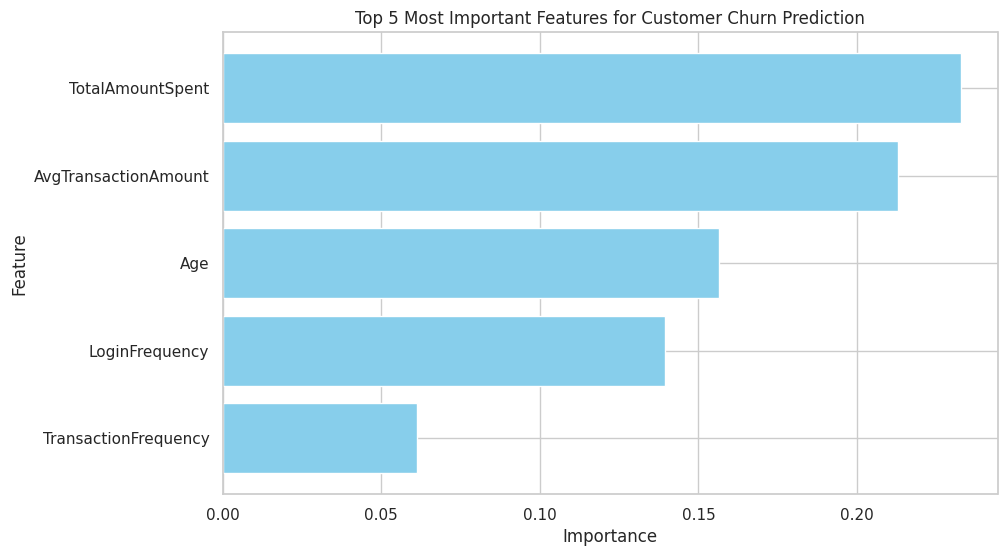

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Predict on the test set
gb_test_pred = best_gb_model.predict(X_test)
gb_test_prob = best_gb_model.predict_proba(X_test)[:, 1]

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, gb_test_pred)
precision = precision_score(y_test, gb_test_pred)
recall = recall_score(y_test, gb_test_pred)
f1 = f1_score(y_test, gb_test_pred)
auc_roc = roc_auc_score(y_test, gb_test_prob)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"AUC-ROC: {auc_roc}")

# Print the classification report
print(classification_report(y_test, gb_test_pred))

# Analyze feature importance
feature_importances = best_gb_model.feature_importances_
feature_names = X_test.columns

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Identify the top 5 most important features
top_5_features = feature_importance_df.head(5)

# Create a horizontal bar chart for the top 5 features
plt.figure(figsize=(10, 6))
plt.barh(top_5_features['Feature'], top_5_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 5 Most Important Features for Customer Churn Prediction')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.show()

## Summary

> Here is a concise summary of each step taken to complete this project:

1.  **Data Loading**
    *   Loaded five sheets from the Excel file "Customer_Churn_Data_Large.xlsx" into separate pandas DataFrames.

2.  **Data Exploration**
    *   Explored the structure, data types, missing values, distributions, and visualizations of key numerical variables for each DataFrame.

3.  **Data Cleaning**
    *   Checked for duplicate records in each DataFrame and confirmed none were present.

4.  **Data Wrangling**
    *   Merged the five DataFrames into a single DataFrame (`df_merged`) using `CustomerID` as the key with left joins, and checked for inconsistencies.

5.  **Feature Engineering**
    *   Created derived variables such as `TotalAmountSpent`, `AvgTransactionAmount`, `TransactionFrequency`, and `AgeGroup`.

6.  **Data Visualization**
    *   Created visualizations to show churn rate across categorical features, numerical comparisons between churned and retained customers, time-based churn trends, and correlations with churn.

7.  **Data Preparation**
    *   Handled categorical features using one-hot encoding, scaled numerical features using StandardScaler, imputed missing values, and selected the top 10 most important features for the prepared dataset (`df_prepared`).

8.  **Data Splitting**
    *   Split the prepared dataset into training (70%) and test (30%) sets.

9.  **Model Training**
    *   Trained Logistic Regression, Random Forest, and Gradient Boosting models using the training data.

10. **Model Optimization (Hyperparameter Tuning)**
    *   Performed hyperparameter tuning using RandomizedSearchCV for Logistic Regression, Random Forest, and Gradient Boosting models on the training data.

11. **Model Evaluation**
    *   Evaluated the best performing model (Gradient Boosting) on the test set and reported performance metrics (accuracy, precision, recall, F1-score, AUC-ROC) and analyzed feature importance.

## Conclusion

> This project aimed to enhance customer retention for SmartBank by developing a predictive model to identify at-risk customers. Through a comprehensive data science workflow, including data loading, exploration, cleaning, wrangling, feature engineering, visualization, and model training, we gained valuable insights into customer behavior and built a robust churn prediction model.

### Key Insights

1.  **Data Analysis and Visualization**
    *   There were no missing values or inconsistencies in the initial data, and data types were appropriate.
    *   The merged dataset revealed missing values in `InteractionID`, `InteractionDate`, `InteractionType`, and `ResolutionStatus`, suggesting that not all customers had service interactions.
    *   Key churn drivers identified through analysis and visualizations include lower total amount spent, lower login frequency, and lower transaction frequency among churned customers.
    *   Churn rate varies across demographic and behavioral segments, with slightly higher churn among male, single, low-income customers, and those using the mobile app, as well as those who purchased electronics.
    *   Monthly churn rate showed fluctuations throughout the year 2022, with peaks in March and a dip in April.

2.  **Model Selection and Evaluation**
    *   Three models were trained: Logistic Regression, Random Forest, and Gradient Boosting.
    *   The initial Logistic Regression model performed poorly due to class imbalance, exhibiting zero precision and recall for the churn class.
    *   Hyperparameter tuning significantly improved the performance of the Gradient Boosting and Random Forest models.
    *   The Gradient Boosting model emerged as the best-performing model, achieving high accuracy (0.996), precision (0.993), recall (0.985), F1-score (0.989), and AUC-ROC (0.993) on the test set.

### Recommendations

*   **Develop targeted retention campaigns:** Based on the identified high-risk segments (e.g., low-income, low-usage, young adults, mobile app users), create personalized offers and communications to re-engage these customers.
*   **Improve mobile app experience:** Address potential issues or enhance features in the mobile app to increase engagement and reduce churn among mobile app users.
*   **Proactively address service interactions:** Investigate the missing service interaction data to understand if there's a gap in tracking or if customers are not reaching out when experiencing issues, and implement proactive support measures.
* **Monitor seasonal churn spikes:** Prepare special retention offers ahead of March, September and October to counter competitor promotions.

### Next Steps

*   **Deploy the Gradient Boosting model:** Implement the trained Gradient Boosting model into a production environment to identify at-risk customers in real-time.
*   **Monitor model performance:** Continuously monitor the model's performance metrics and retrain the model periodically with new data to ensure its accuracy and relevance.
*   **Further investigate churn drivers:** Deep dive into the top features identified by the model to understand the underlying reasons for churn and refine retention strategies.
*   **Explore advanced techniques:** Consider exploring more advanced techniques for handling class imbalance and potentially other modeling algorithms to further improve prediction accuracy.